# Overfitting and Underfitting

Preventing Overfitting, 
Solving Overfitting in Our Dataset : Train with more data , 
Preventing Underfitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fruit_dataset.csv')

In [3]:
df.head(10)

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81
8,1,apple,178,7.1,7.8,0.92
9,1,apple,172,7.4,7.0,0.89


In [4]:
df.shape

(61, 6)

In [5]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

In [6]:
x = df.iloc[: , 2:5]
y = df.iloc[: , 0]
print(x)
print(y)

    mass  width  height
0    192    8.4    7.30
1    180    8.0    6.80
2    176    7.4    7.20
3     86    6.2    4.70
4     84    6.0    4.60
..   ...    ...     ...
56   116    5.9    8.10
57   152    6.5    8.50
58   118    6.1    8.10
59   201    7.7   10.10
60   209    8.1   12.11

[61 rows x 3 columns]
0     1
1     1
2     1
3     2
4     2
     ..
56    4
57    4
58    4
59    5
60    5
Name: fruit_label, Length: 61, dtype: int64


# Preventing Overfitting:

1. Using Cross validation:

Cross validation is a very powerful preventive measure against overfitting, with a clever idea. Create multiple mini train-validation splits within the original train data, and use these to tune your model.

We have a standard way of doing so, called the “k-fold cross validation”. What we do here is, partition the dataset into k subsets which we call “folds”.

Then we iteratively train our model on k – 1 folds. Why? We keep the last one as a validation dataset. The last fold is called the “holdout fold”.

Using cross validation, you can tune your hyperparameters only with your original training dataset. This way, you can keep the validation set as a completely unseen dataset.

K-fold cross validation might not completely remove the overfitting, so we can change the folds every now and then, or use multiple k-fold cross validations together.

2. Train with more data:

The signal will be better detected by the algorithm if we train the model with more data. Although it doesn’t work every time, for example if we just add more noisy data, then this technique won’t help.

3. Remove Features

In algorithms that don’t have a built-in feature selection, their generalization can be manually improved by removing some irrelevant or unimportant features. Why is removing features helpful? Sometimes it may happen that the model may fail to generalize simply because the model missed the patterns that should have been detected, and the data was too complex for the same.

4. Add Regularization:

As we discussed earlier, that overfitting could be a consequence of the model being too complex. Can we forcefully make it simpler? Yes! Regularization is the term for a range of techniques that could be used to force your model into being simpler. The techniques used to regularize any model will depend on the model itself. For example, an option could be pruning a decision tree, on neural networks you could use a dropout, or, to the cost function in regression, a penalty parameter could be added. Confusing terms eh? Google them!

# Identify Overfitting in Our Dataset

In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2 , random_state = 1)

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
from sklearn import metrics

print('Training score: ', lr.score(x_train,y_train))
print('Testing score : ',lr.score(x_test , y_test))

Training score:  0.7291666666666666
Testing score :  0.46153846153846156


Case of Overfitting

In [10]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

# Solving Overfitting in Our Dataset : Train with more data

We can change the dataset that we are using to build our predictive model to have more balanced data.

This approach is normally referred to as sampling the dataset. There are two main methods that are typically used.

Upsampling/OverSampling
DownSampling/UnderSampling
Since our dataset is small and we want to increase it we will use Upsampling/OverSampling techique

In [11]:
from sklearn.utils import resample

mandarin = df[df.fruit_label==2]

mandarin_data_upsampled = resample(mandarin, 
                                   replace = True,
                                   n_samples = 19-5,
                                   random_state = 67)

In [12]:
mandarin_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
6,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,80,5.8,4.3,0.77
4,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
6,2,mandarin,80,5.9,4.3,0.81
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
3,2,mandarin,86,6.2,4.7,0.80
6,2,mandarin,80,5.9,4.3,0.81


In [13]:
mandarin_data_upsampled = mandarin_data_upsampled.reset_index(drop = True)

In [14]:
mandarin_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,2,mandarin,80,5.9,4.3,0.81
1,2,mandarin,80,5.8,4.3,0.77
2,2,mandarin,84,6.0,4.6,0.79
3,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,80,5.9,4.3,0.81
6,2,mandarin,84,6.0,4.6,0.79
7,2,mandarin,80,5.9,4.3,0.81
8,2,mandarin,86,6.2,4.7,0.80
9,2,mandarin,80,5.9,4.3,0.81


In [15]:
frame = [df,mandarin_data_upsampled]
df = pd.concat(frame , axis = 0)
df

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
...,...,...,...,...,...,...
9,2,mandarin,80,5.9,4.3,0.81
10,2,mandarin,76,5.8,4.0,0.81
11,2,mandarin,84,6.0,4.6,0.79
12,2,mandarin,80,5.8,4.3,0.77


In [16]:
from sklearn.utils import resample

mango = df[df.fruit_label==5]

mango_data_upsampled = resample(mango, 
                                   replace = True,
                                   n_samples = 19-2,
                                   random_state = 67)

In [17]:
mango_data_upsampled = mango_data_upsampled.reset_index(drop= True)
mango_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,5,mango,209,8.1,12.11,0.78
1,5,mango,209,8.1,12.11,0.78
2,5,mango,201,7.7,10.10,0.71
3,5,mango,209,8.1,12.11,0.78
4,5,mango,209,8.1,12.11,0.78
5,5,mango,209,8.1,12.11,0.78
6,5,mango,209,8.1,12.11,0.78
7,5,mango,209,8.1,12.11,0.78
8,5,mango,209,8.1,12.11,0.78
9,5,mango,201,7.7,10.10,0.71


In [18]:
frame = [df,mango_data_upsampled]
df = pd.concat(frame , axis = 0)
df 

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.30,0.55
1,1,apple,180,8.0,6.80,0.59
2,1,apple,176,7.4,7.20,0.60
3,2,mandarin,86,6.2,4.70,0.80
4,2,mandarin,84,6.0,4.60,0.79
...,...,...,...,...,...,...
12,5,mango,209,8.1,12.11,0.78
13,5,mango,209,8.1,12.11,0.78
14,5,mango,201,7.7,10.10,0.71
15,5,mango,209,8.1,12.11,0.78


In [19]:
x = df.iloc[: , 2:5]
y = df.iloc[: , 0]
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2 , random_state = 1)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)
from sklearn import metrics

print('Training score: ', lr.score(x_train,y_train))
print('Testing score : ',lr.score(x_test , y_test))

Training score:  0.7671232876712328
Testing score :  0.7894736842105263


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Preventing Underfitting:
1. Increasing the Complexity of the model:

A probable cause of underfitting could be the fact that the model is not complex enough to understand the underlying patterns in data. Making the switch to say, a non-linear model from a linear model or, say, by adding more hidden layers to your existing neural network could be ways to make the model more complex, and in turn could help in removal of underfitting.

2. Reducing Regularization:

Well, underfitting is somewhat close to the opposite of overfitting. So, as we read earlier, regularization could help solve the overfitting problem, then reducing it could solve the underfitting problem! Some of the algorithms you use by default include some regularization parameters meant to suppress overfitting. Sometimes, these could also cause hindrance in the learning of the algorithm. Decreasing their values for the most part, makes a difference. You must be thinking, that if underfitting is almost the opposite of overfitting, then maybe adding more features or data would help solve the problem? NO! If the dataset lacks features that are decisive, and important that could help your model in detecting patterns, you can multiply the training data set by 2 or 5, or even 10, but it will not help in making your algorithm better. It is a common notion to think that throwing more data would solve the problem, but as stated earlier, it might just jeopardize the project.

In [20]:
weather_data_p = pd.read_csv('WeatherDataP.csv')
weather_data_p

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


In [21]:
x = weather_data_p[['Pressure (millibars)']]
y = weather_data_p.Humidity

In [22]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 1)

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [24]:
from sklearn import metrics

print('Training score : ' , lr.score(x_train , y_train))
print('Testing score : ' , lr.score(x_test , y_test))

Training score :  0.29065760334760526
Testing score :  0.14324706577023627


<IPython.core.display.Javascript object>

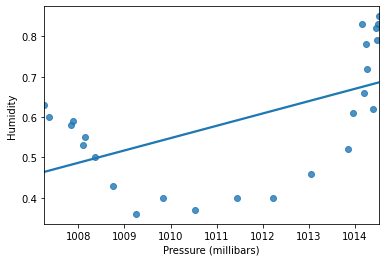

In [25]:
sns.regplot(x,y,ci = None)
plt.show()

our dataset is not linear so linear regression is not fitting well.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
pre_process = PolynomialFeatures(degree = 2)
x_poly = pre_process.fit_transform(x)
x_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

In [27]:
df_x_poly = pd.DataFrame(x_poly)
df_x_poly.columns = ['1','x','x_squared']
df_x_poly

,1,x,x_squared
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06
5,1.0,1014.52,1.029251e+06
6,1.0,1014.16,1.028521e+06
7,1.0,1014.24,1.028683e+06
8,1.0,1014.25,1.028703e+06
9,1.0,1013.96,1.028115e+06


In [28]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train , y_test = train_test_split(x_poly,y,test_size = 0.2 , random_state = 1)

In [29]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(x_poly)

In [31]:
from sklearn import metrics

print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.821262219719311
test score:  0.9427391324386682


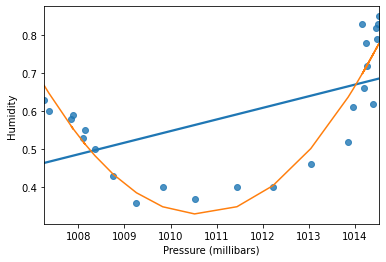

In [32]:
import seaborn as sns

sns.regplot(x,y,fit_reg = True ,ci = None)
plt.plot(x,y_pred)
plt.show()